<a href="https://colab.research.google.com/github/hasandel01/machine_learning/blob/main/MLStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols = ["fLength", "fWidth" , "fSize", "fConc", "fConc1", "fAsym", "fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


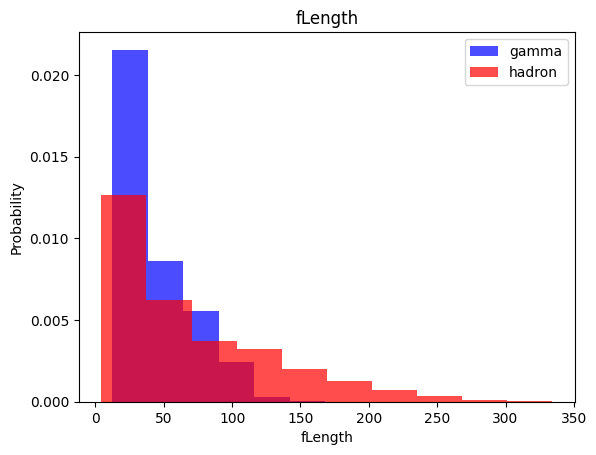

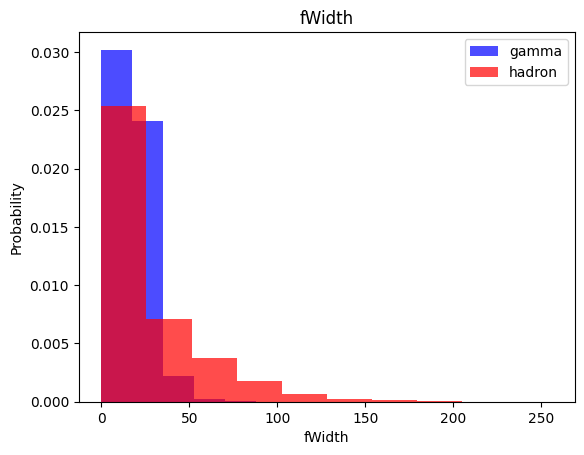

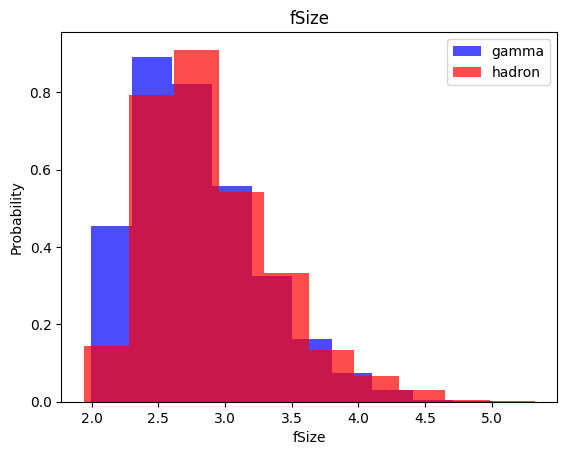

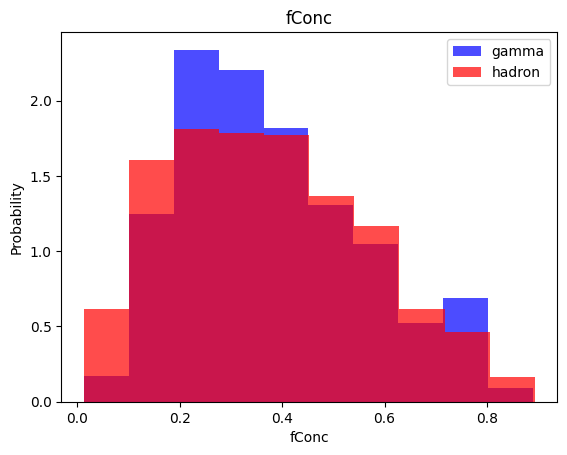

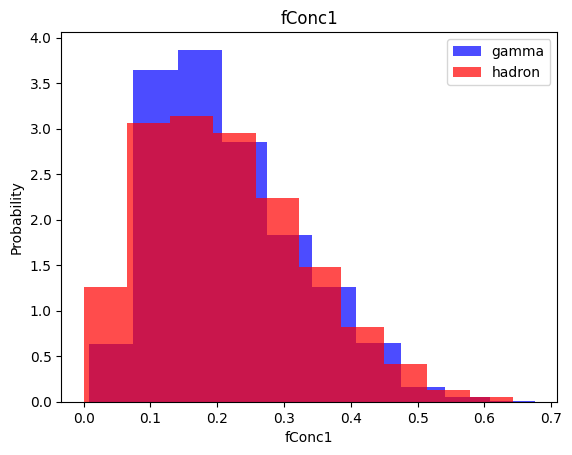

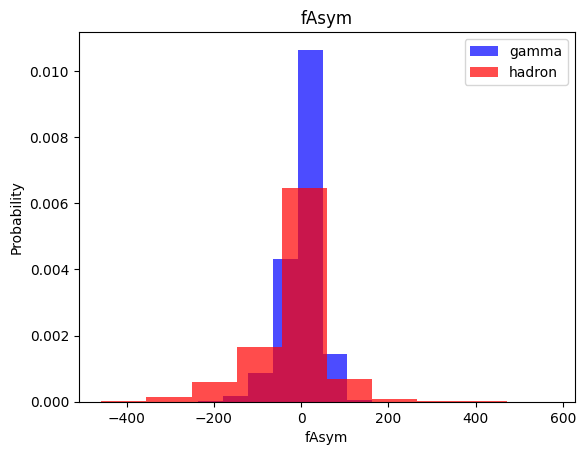

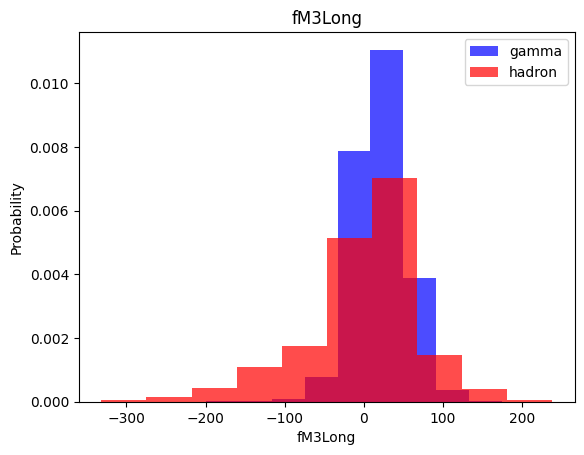

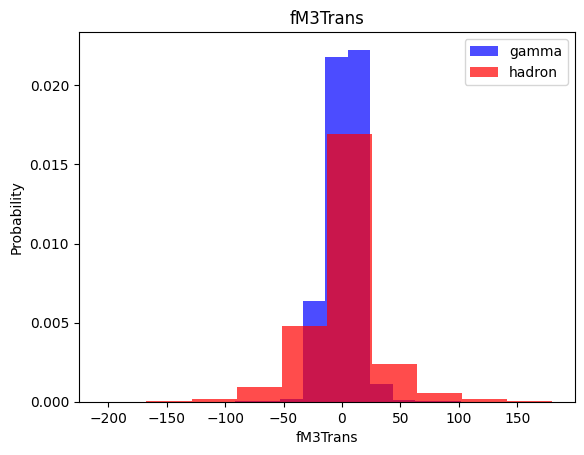

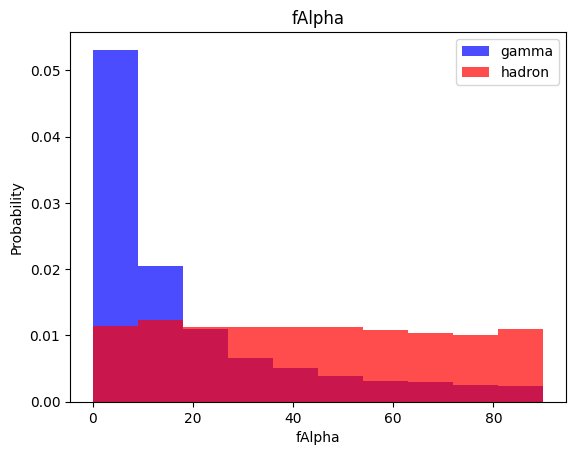

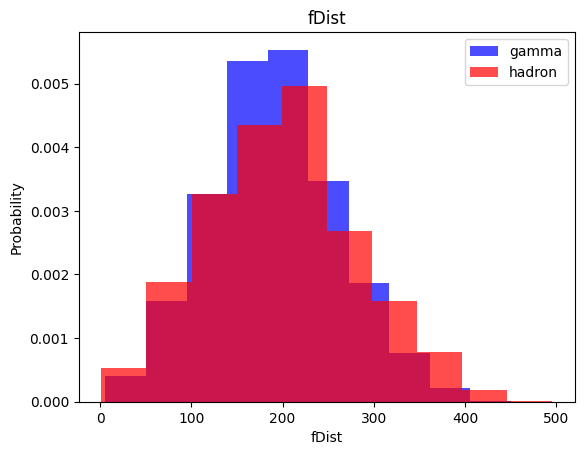

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


# KNN


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1337
           1       0.86      0.85      0.85      2467

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#NAIVE BAYES


In [17]:
from sklearn.naive_bayes import GaussianNB


In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53      1337
           1       0.74      0.90      0.81      2467

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logical_model = LogisticRegression()
logical_model = logical_model.fit(X_train,y_train)

In [22]:
y_pred = logical_model.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1337
           1       0.84      0.81      0.82      2467

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM
  

In [24]:
from sklearn.svm import SVC


In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [26]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1337
           1       0.89      0.89      0.89      2467

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# NN_MODEL

In [28]:
import tensorflow as tf


In [33]:
def plot_loss(history):
  plt.plot(history.history["loss"],label="loss")
  plt.plot(history.history["val_loss"], label="val_loss")
  plt.xlabel=("Epoch")
  plt.ylabel=("Binary Crossentropy")
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history["accuracy"],label="accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.xlabel=("Epoch")
  plt.ylabel=("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

In [35]:
def train_model(X_train,y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss ="binary_crossentropy", metrics =["accuracy"])

  history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)

  return nn_model, history

16 nodes, dropout_prob of 0, lr is 0.01, batch_size = 32 for 100 epochs


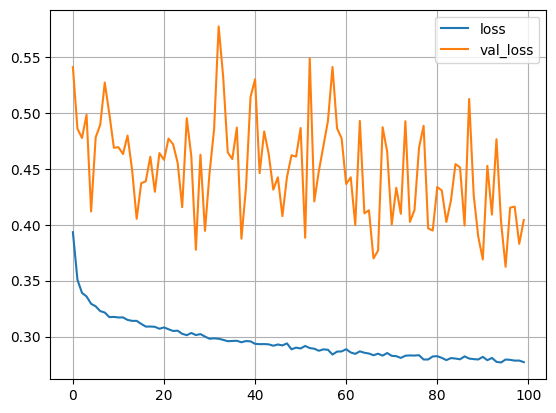

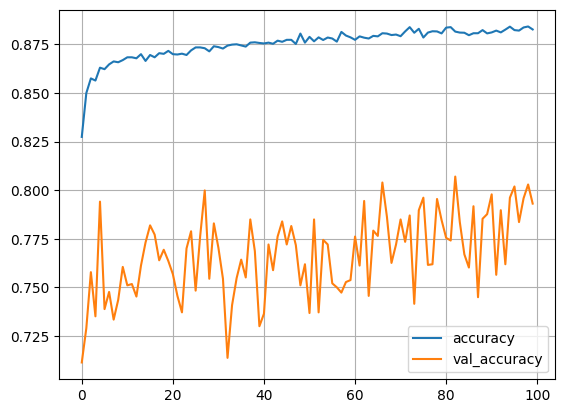

119/119 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8646
16 nodes, dropout_prob of 0, lr is 0.01, batch_size = 64 for 100 epochs


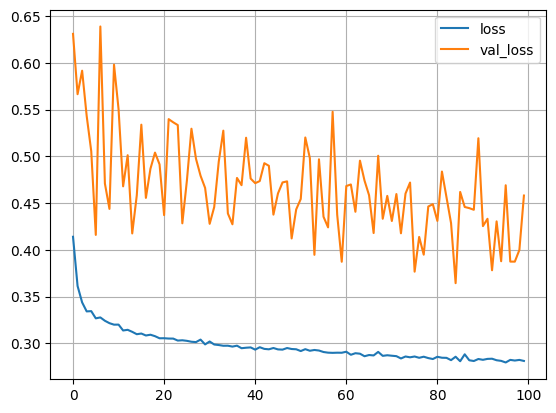

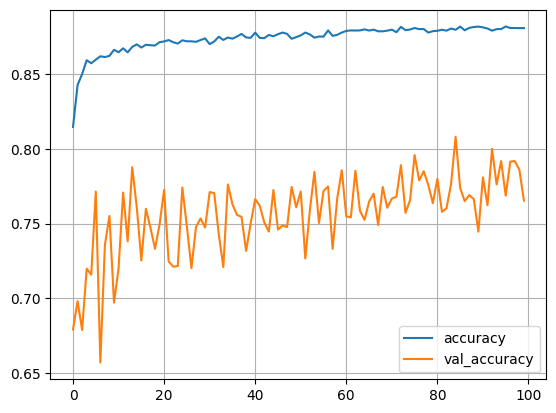

119/119 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.8730
16 nodes, dropout_prob of 0, lr is 0.01, batch_size = 128 for 100 epochs


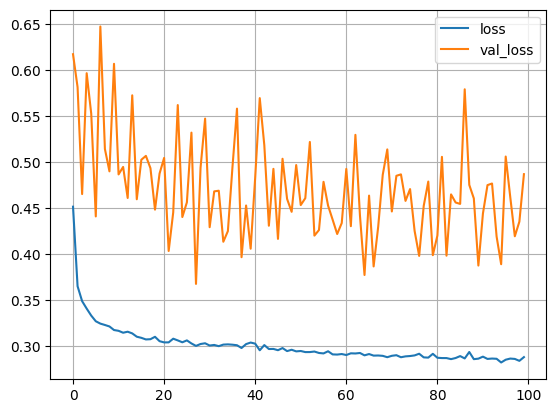

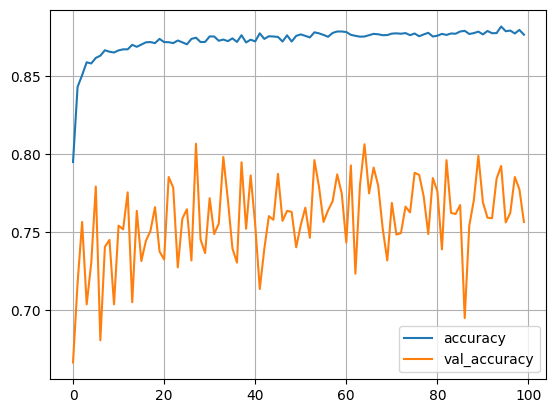

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8728
16 nodes, dropout_prob of 0, lr is 0.005, batch_size = 32 for 100 epochs


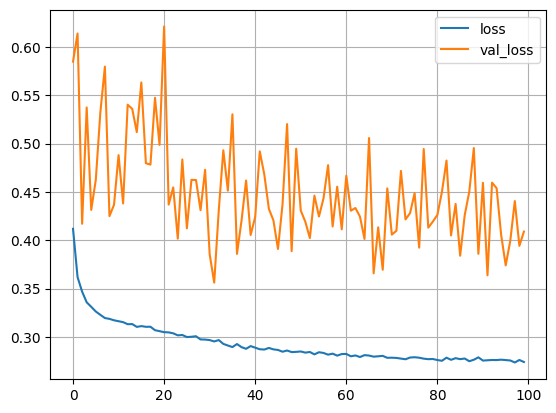

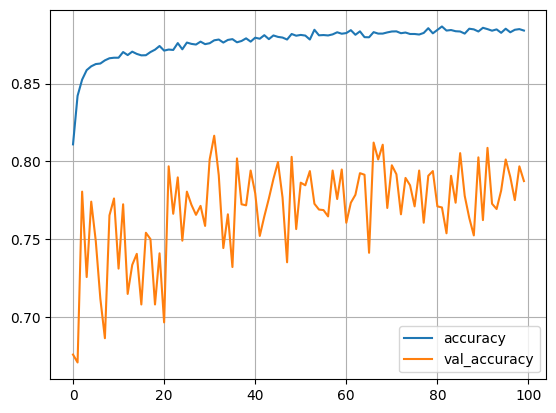

119/119 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8715
16 nodes, dropout_prob of 0, lr is 0.005, batch_size = 64 for 100 epochs


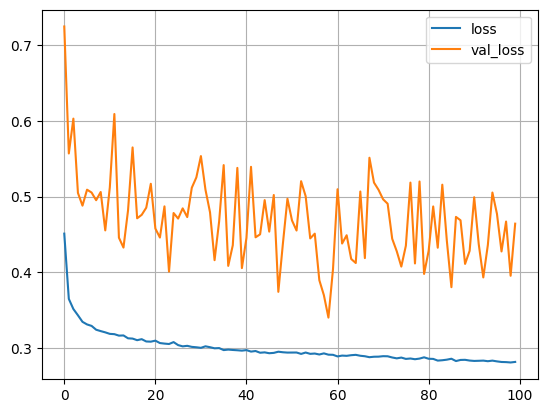

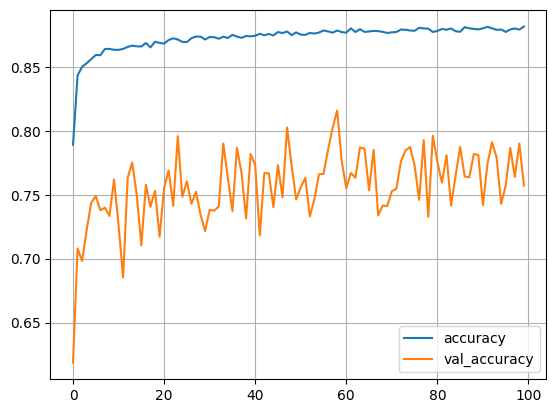

119/119 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8780
16 nodes, dropout_prob of 0, lr is 0.005, batch_size = 128 for 100 epochs


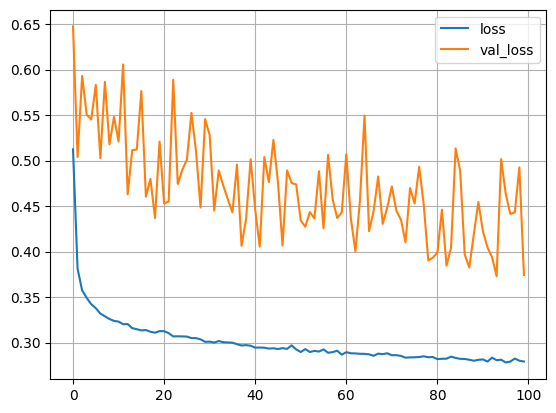

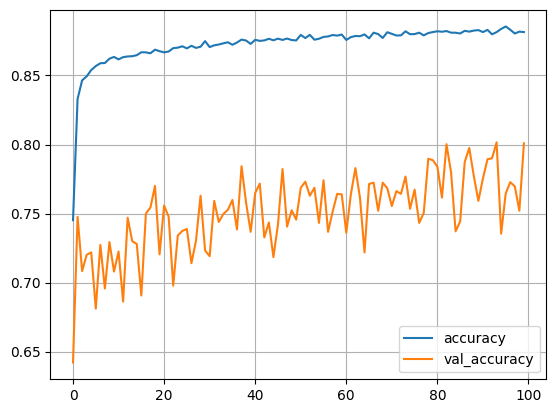

119/119 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8764
16 nodes, dropout_prob of 0, lr is 0.001, batch_size = 32 for 100 epochs


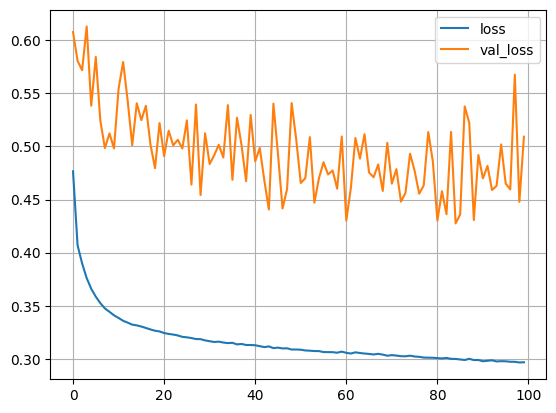

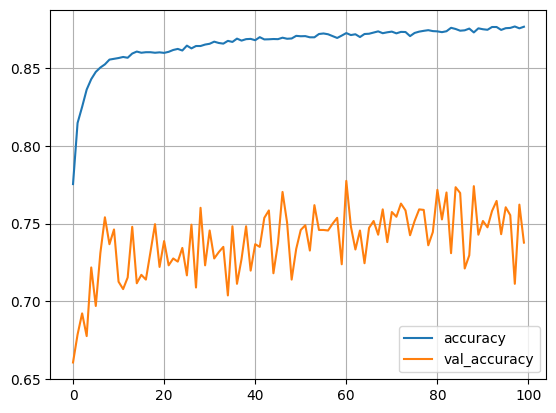

119/119 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8717
16 nodes, dropout_prob of 0, lr is 0.001, batch_size = 64 for 100 epochs


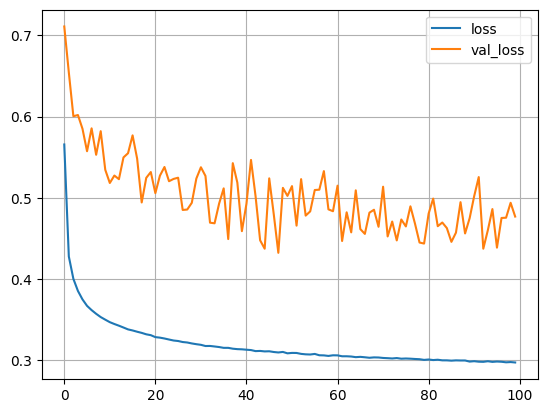

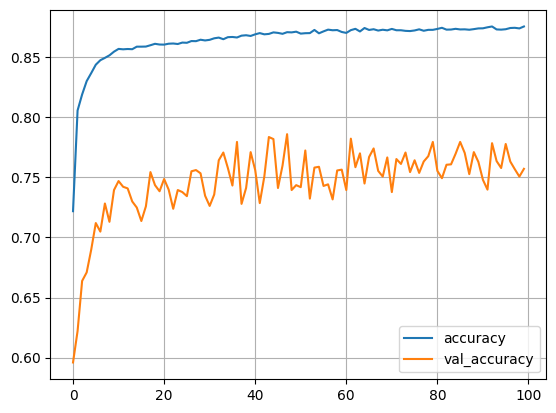

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8754
16 nodes, dropout_prob of 0, lr is 0.001, batch_size = 128 for 100 epochs


In [ ]:
least_value_loss = float("inf")
least_loss_model = None

epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout_prob of {dropout_prob}, lr is {lr}, batch_size = {batch_size} for 100 epochs")
        model, history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_loss(history)
        plot_accuracy(history)
        value_loss = model.evaluate(X_valid,y_valid)[0]
        if value_loss < least_value_loss:
          least_value_loss = value_loss
          least_loss_model = model



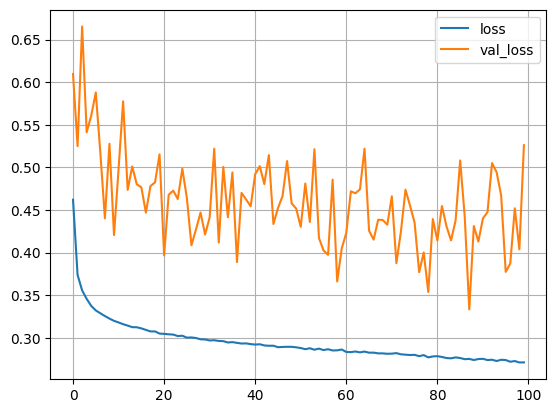

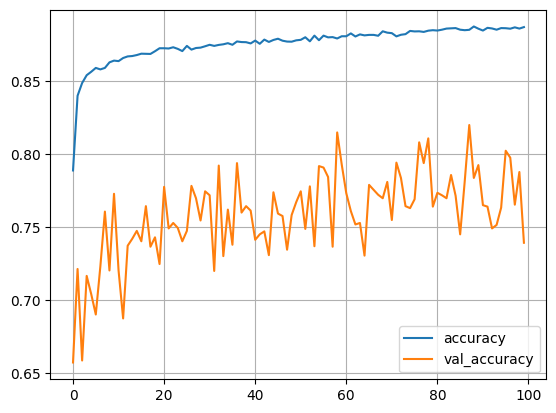

In [34]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test,y_pred))